### Installing and Importing necessary packages

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install requests

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import requests
%matplotlib inline

### Downloading dataset from IBM cloud

We have a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source:


**MODELYEAR** e.g. 2014

**MAKE** e.g. Acura

**MODEL** e.g. ILX

**VEHICLE CLASS** e.g. SUV

**ENGINE SIZE** e.g. 4.7

**CYLINDERS** e.g 6

**TRANSMISSION** e.g. A6

**FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9

**FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9

**FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2

**CO2 EMISSIONS (g/km)** e.g. 182 --> low --> 0

In [3]:
dataset_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
query_parameters = {"downloadformat": "csv"}
response = requests.get(dataset_path, params=query_parameters)
with open("FuelConsumptionCo2.csv", mode="wb") as file:
     file.write(response.content)

### Exploring the dataset

In [4]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Feature selection

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,8.5,33,196
1,2.4,4,9.6,29,221
2,1.5,4,5.9,48,136
3,3.5,6,11.1,25,255
4,3.5,6,10.6,27,244
5,3.5,6,10.0,28,230
6,3.5,6,10.1,28,232
7,3.7,6,11.1,25,255
8,3.7,6,11.6,24,267


Visualizing the histogram plot for the number of Cylinders and Engine Sizes.

Text(0.5, 1.0, 'ENGINESIZE histogram')

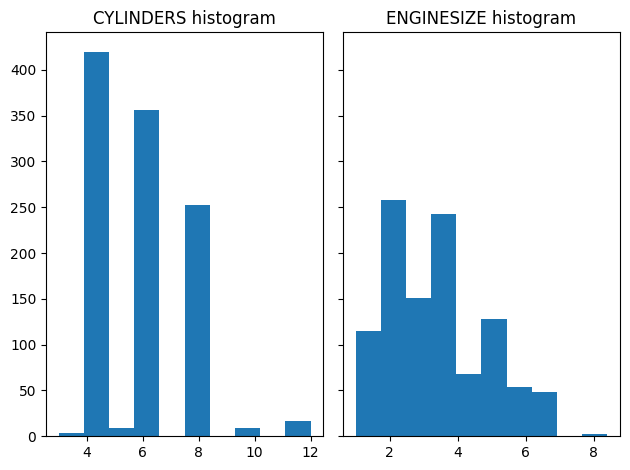

In [80]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(viz['CYLINDERS'])
axs[0].set_title('CYLINDERS histogram')

axs[1].hist(viz['ENGINESIZE'])
axs[1].set_title('ENGINESIZE histogram')

Plotting Fuel Consumption vs. the CO2 Emissions

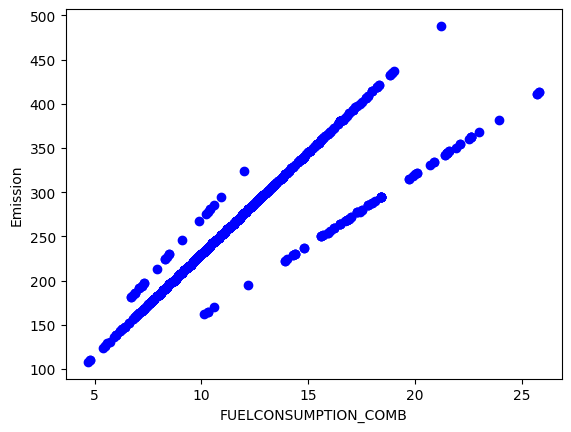

In [81]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

Plotting Engine Size vs. the CO2 Emissions

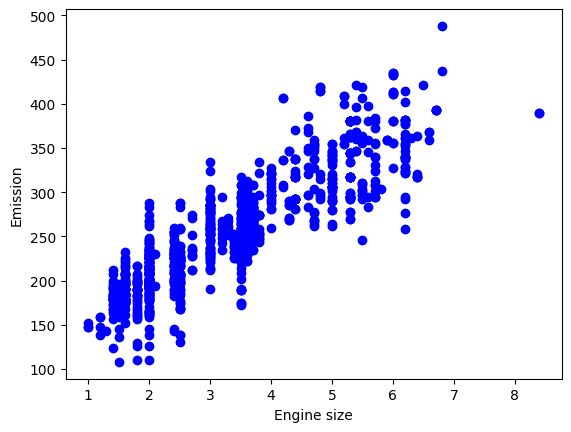

In [82]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Plotting Number of Cylinders vs. the CO2 Emissions

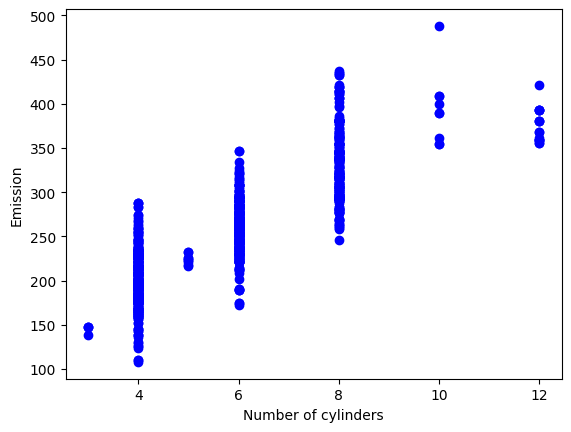

In [83]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Number of cylinders")
plt.ylabel("Emission")
plt.show()

### Creating train and test dataset

In [84]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution

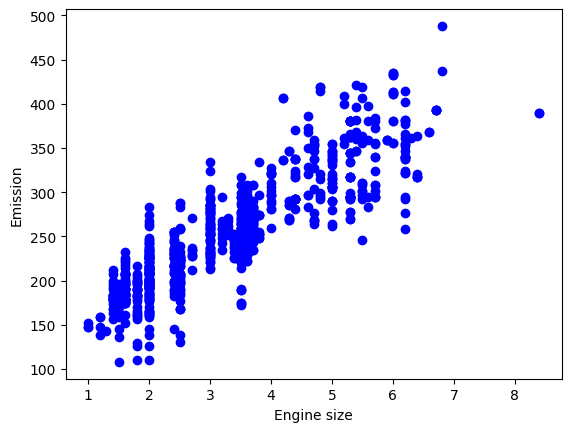

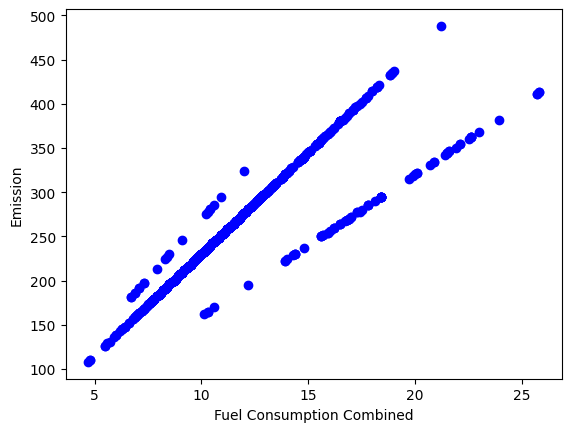

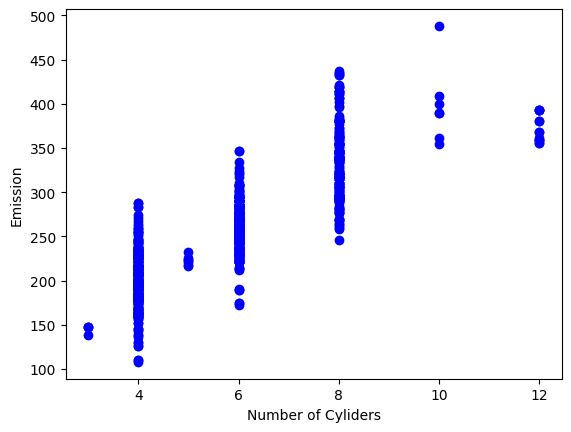

In [89]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

print('\n')

plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption Combined")
plt.ylabel("Emission")
plt.show()

print('\n')

plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Number of Cyliders")
plt.ylabel("Emission")
plt.show()

### Modeling

In [101]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x_engineSize = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x_engineSize, train_y)
# The coefficients
print ('ENGINESIZE Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


ENGINESIZE Coefficients:  [[39.16263749]]
Intercept:  [125.19371111]


### Outputs

Text(0, 0.5, 'Emission')

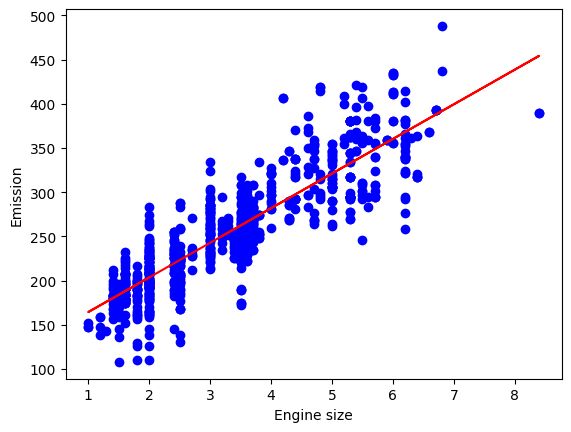

In [102]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation

In [103]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.23
Residual sum of squares (MSE): 863.33
R2-score: 0.77
